# Project Description: Twitter US Airline Sentiment

Name: Ghaidaa Al Kuhaili

Link: 

# Steps and Tasks

# Step one

# 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [2]:
# More libraries will be imported below within code lines

# 2. load dataset

In [3]:
twitter_data = pd.read_csv('tweets.csv')
twitter_data.head()
#twitter_data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# 3. print shape of data

In [4]:
twitter_data.shape

(14640, 15)

In [5]:
# The data consist of 15 cloumns and 14640 rows

# 4. data description

In [6]:
twitter_data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
# The statistical analysis is not helpful in this business case, as we are interested in below two columns:

# [['text','airline_sentiment']]

# Which are categorical

In [8]:
twitter_data.isnull().sum(axis = 0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
# This shows that we have some missing values, but again, we are only interested in [['text','airline_sentiment']].

In [10]:
twitter_data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [11]:
# Above we are checking the unique values of our ['airline_sentiment']. In other words, we are checking our classes.

In [12]:
twitter_data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [13]:
# Above we are checking the number of existance of each class. 

# We can observe that most of the sentiments are Negative. 

# The Neural sentiments are more than the positive ones, which might miss lead our prediction.

# Step Two: Understand of data-columns

# 1. Drop all other columns except “text” and “airline_sentiment”

In [14]:
twitter_data = twitter_data[['text','airline_sentiment']]

In [15]:
# Keeping only [['text','airline_sentiment']]

# 2. Check the shape of data

In [16]:
twitter_data.shape

(14640, 2)

In [17]:
# After dropping, we have two columns and 14640 rows.

# 3. Print first 5 rows of data

In [18]:
twitter_data.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


# Step Three: Text pre-processing: Data preparation

# 1. Html tag removal

In [19]:
from bs4 import BeautifulSoup                #import BeautifulSoup library

def strip_html_tags(text):                   #define function
    
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


twitter_data['text'] = twitter_data['text'].apply(lambda x: strip_html_tags(x))
twitter_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


# 2. Remove the numbers

In [20]:
import re                        #import regular expression library

def remove_numbers(text):        #define function
    
    text = re.sub(r'\d+','',text)#to replace the digits with space
    return text

twitter_data['text'] = twitter_data['text'].apply(lambda x:remove_numbers(x))
twitter_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


# 3. Removal of Special Characters and Punctuations

In [21]:
def remove_special_characters(text):        #define a function to remove special characters
    pattern = r'[^a-zA-z\s]'                #the pattern is anything which is not letters
    text = re.sub(pattern, '', text)        #replace whatever exists in the pattern with a space
    return text

def remove_punctuation(text):               #define a function to remove punctuations
    pattern = r'[^\w\s]'                    #the pattern is all non-word-characters
    text = re.sub(pattern, '', text)        #replace whatever exists in the pattern with a space
    return text

twitter_data['text'] = twitter_data['text'].apply(lambda x:remove_special_characters(x))
twitter_data['text'] = twitter_data['text'].apply(lambda x:remove_punctuation(x))
twitter_data.head()

,text,airline_sentiment
0,VirginAmerica What dhepburn said,neutral
1,VirginAmerica plus youve added commercials to ...,positive
2,VirginAmerica I didnt today Must mean I need t...,neutral
3,VirginAmerica its really aggressive to blast o...,negative
4,VirginAmerica and its a really big bad thing a...,negative


# 4. Conversion to lowercase

In [22]:
def to_lower(text):                      #define a function to convert all letters to a lower-case
    
    text = text.lower()
    return text

twitter_data['text'] = twitter_data['text'].apply(lambda x:to_lower(x))
twitter_data.head()

,text,airline_sentiment
0,virginamerica what dhepburn said,neutral
1,virginamerica plus youve added commercials to ...,positive
2,virginamerica i didnt today must mean i need t...,neutral
3,virginamerica its really aggressive to blast o...,negative
4,virginamerica and its a really big bad thing a...,negative


# 5. Lemmatize or stemming

In [23]:
import nltk                         #import nltk library

nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()    #define a lemmatizer object

def lemmatize(text):
    text = lemmatizer.lemmatize(text, pos = 'v')
    return text

twitter_data['text'] = twitter_data['text'].apply(lambda x:lemmatize(x))
twitter_data.head()

[nltk_data] Downloading package wordnet to /Users/kuhaili/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,airline_sentiment
0,virginamerica what dhepburn said,neutral
1,virginamerica plus youve added commercials to ...,positive
2,virginamerica i didnt today must mean i need t...,neutral
3,virginamerica its really aggressive to blast o...,negative
4,virginamerica and its a really big bad thing a...,negative


# 6. Tokenization

In [24]:
#import nltk            #already imported in the above cell, just for confirmation

from nltk.tokenize.toktok import ToktokTokenizer

twitter_data['text'] = twitter_data.apply(lambda row: nltk.word_tokenize(row['text']),axis = 1)

twitter_data.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, said]",neutral
1,"[virginamerica, plus, youve, added, commercial...",positive
2,"[virginamerica, i, didnt, today, must, mean, i...",neutral
3,"[virginamerica, its, really, aggressive, to, b...",negative
4,"[virginamerica, and, its, a, really, big, bad,...",negative


# 7. Join the words in the list to convert back to text string in the dataframe

In [25]:
def join(text):
    return ' '.join(text) #to concatenate the words together witha space between them

twitter_data['text'] = twitter_data['text'].apply(lambda x:join(x))
twitter_data.head()

,text,airline_sentiment
0,virginamerica what dhepburn said,neutral
1,virginamerica plus youve added commercials to ...,positive
2,virginamerica i didnt today must mean i need t...,neutral
3,virginamerica its really aggressive to blast o...,negative
4,virginamerica and its a really big bad thing a...,negative


# 8. Print first 5 rows of data after pre-processing

In [26]:
twitter_data.head(5)

,text,airline_sentiment
0,virginamerica what dhepburn said,neutral
1,virginamerica plus youve added commercials to ...,positive
2,virginamerica i didnt today must mean i need t...,neutral
3,virginamerica its really aggressive to blast o...,negative
4,virginamerica and its a really big bad thing a...,negative


# Step Four: Vectorization

# 1. Use CountVectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer      #import library

vectorizer = CountVectorizer(max_features = 5000)
data_features = vectorizer.fit_transform(twitter_data['text'])

data_features = data_features.toarray()

In [28]:
data_features.shape

(14640, 5000)

In [29]:
# The shape of the data changed to have more columns

In [30]:
# Define X and y 

X = data_features

y = twitter_data.airline_sentiment

In [31]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Step Five: Fit and evaluate model

a. Fit the model

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Using random forest as our model
forest = RandomForestClassifier(n_estimators = 10, n_jobs = 4)
forest = forest.fit(X_train,y_train)

print(forest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


b. Evaluate the model

In [33]:
#to evaluate the model, calculate the score(accuracy)
print(np.mean(cross_val_score(forest,X,y,cv = 10)))

0.7132463092441318


In [34]:
#to predict
result = forest.predict(X_test)

In [35]:
#y_test

[[2650  121   43]
 [ 486  345   53]
 [ 272   97  325]]


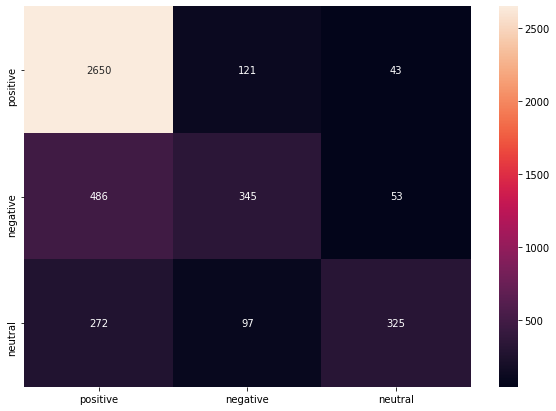

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#printing the confusion matrix
conf_mat = confusion_matrix(y_test, result)

print (conf_mat)

#defining rows and columns of the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive','negative','neutral']],
                    columns = [i for i in ['positive','negative','neutral']])

#define confusion matrix size
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt='g')

In [37]:
#to understand the confusion matrix, we need to first calculate how many positive,negative,neutral sentiments we have
#in y_test:

y_test.value_counts()

negative    2814
neutral      884
positive     694
Name: airline_sentiment, dtype: int64

In [38]:
#so we have 694 positives in y_test. In the confusion matrix 2646 were predicted as positive (overfitting?)
#we also have 2814 negatives in y_test, but only 351 were predicted as negatives.
#and so on.

# 2. Use TfidfVectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer    #import library

vectorizer = TfidfVectorizer(max_features = 5000)
data_features = vectorizer.fit_transform(twitter_data['text'])

data_features = data_features.toarray()

In [40]:
data_features.shape    #the size changed

(14640, 5000)

In [41]:
# define x and y

X = data_features

y = twitter_data.airline_sentiment

In [42]:
#from sklearn.model_selection import train_test_split

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Step Five: Fit and evaluate model

a. Fit the model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Using random forest as our model
forest = RandomForestClassifier(n_estimators = 10, n_jobs = 4)
forest = forest.fit(X_train,y_train)

print(forest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


b. Evaluate the model

In [44]:
#to evaluate the model, calculate the score(accuracy)
print(np.mean(cross_val_score(forest,X,y,cv = 10)))

0.7087374589402604


In [45]:
#almost similar accuracy to CountVectorizer. But, the TfidfVectorizer has lesser accuracy.

In [46]:
#to predict
result = forest.predict(X_test)

In [47]:
#y_test

[[2664  123   27]
 [ 480  353   51]
 [ 302  108  284]]


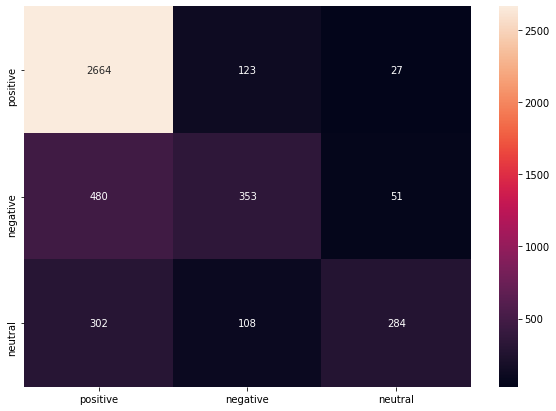

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#printing the confusion matrix
conf_mat = confusion_matrix(y_test, result)

print (conf_mat)

#defining rows and columns of the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive','negative','neutral']],
                    columns = [i for i in ['positive','negative','neutral']])

#define confusion matrix size
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt='g')

In [49]:
#to understand the confusion matrix, we need to first calculate how many positive,negative,neutral sentiments we have
#in y_test:

y_test.value_counts()

negative    2814
neutral      884
positive     694
Name: airline_sentiment, dtype: int64

In [50]:
#so we have 694 positives in y_test. In the confusion matrix 2646 were predicted as positive (overfitting?)
#we also have 2814 negatives in y_test, but only 351 were predicted as negatives.
#and so on.

# Step Six: Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset

In [51]:
# the prediction contains three classes(positive, negative,neutral)
# we built two different models (one using CountVectorizer and the other using TfidfVectorizer)
# both modeles have similar accuracy
# since we are working with NLP, a pre-processing steps were implemented on the text
# upon building the models, predictions were made and model evaluation took place.
# one step forward, is to use other techniques ratehr than random forest to build the models.